In [84]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Úkoly 
1. vykreslete grafy prvních 5 Legendrových polynomů na intervalu [-1,1]

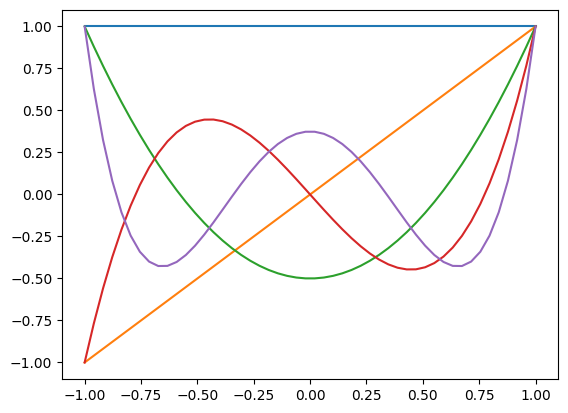

In [85]:
x = np.linspace(-1, 1)
for i in range(5):
    plt.plot(x, sp.special.legendre(i)(x))
plt.show()

2. Vyrobte sparse matici o rozměrech $n^2\times n^2$. Tato matice reprezentuje pravidelnou čtvercovou síť o velikosti $n \times n$. Každá buňka této čtvercové sítě odpovídá jednomu řádku/sloupci matice, přičemž pořadí buněk čtvrtcové sítě berte po řádcích (viz obrázek níže). Hodnoty v matici budou řízeny jedním parametrem $\varepsilon$, pro jednoduchost si místo něj představte $0.1$.
Nenulové hodnoty v matici jsou zadány sousedností buněk a to následovně:
    - hodnoty na diagonále (tedy sousednost prvku se sebou samým) jsou $1 + k \cdot \varepsilon$ (kde $k$ určuje počet sousedních buněk = 4 uvnitř, 3 na hranách, 2 v rozích)
    - mimodiagonální prvky mají hodnotu $-\varepsilon$, právě tehdy pokud index řádku a index sloupce mimodiagonálního prvku odpovídá sousedním buňkám ve čtvercové síti viz obrázek.

Ukázka jak přechází mřížka do matice pro $n=4$ a $\varepsilon = 0.1$ na následujícím obrázku:
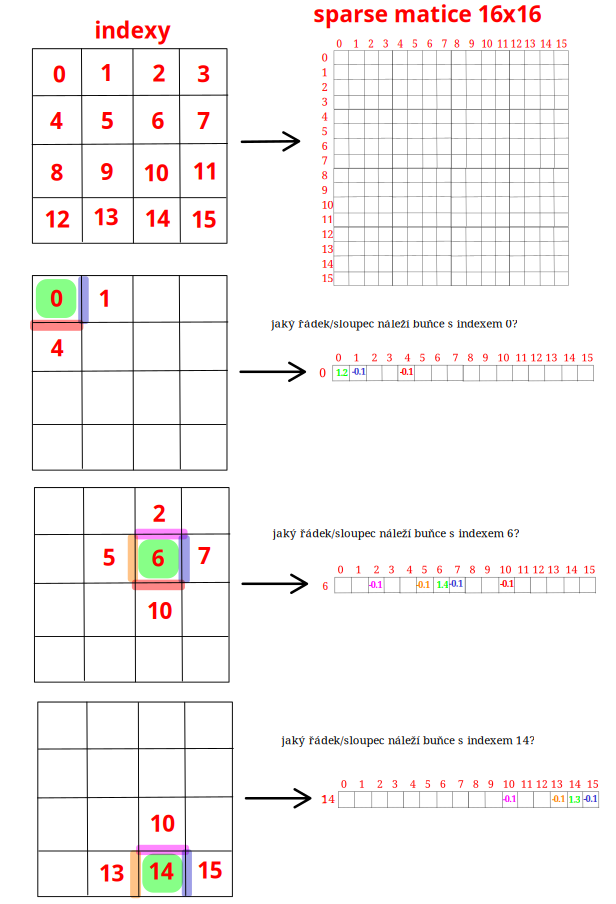


Sestavte matici pomocí formátu LIL a vyplňte hodnoty pomocí cyklu přes všechny buňky čtvercové sítě. Vznikne manice s následujícími vlastnostmi:
- velikost $n^2 \times n^2$
- $\varepsilon$ je parametr, který můžete nastavit, například $\varepsilon = 0.1$
- matice je symetrická, tj. $A = A^T$
- každý řádek/sloupec má maximálně 5 nenulových prvků
    - 5, pokud se jedná o buňku unvitř sítě
    - 4, pokud se jedná o buňku na okraji sítě
    - 3, pokud se jedná o buňku v rohu sítě
- výsledná matice je 5-ti diagonální (hlavní diagonála, dvě vedleší těsně pod a nad hlavní diagonálou, dvě vedleší diagonály ve vzdálenosti $\pm n$ od hlavní diagonály)

Pro $n=3$ a $\varepsilon = 0.1$ by měla matice (v plné formě) měla vypadat následovně:
```python
[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]
 ```


In [86]:
import scipy.sparse as sparse
n = 3
epsilon = 1e-1
A = sparse.lil_matrix((n*n, n*n))

for i in range(n):
    for j in range(n):
        el = j + i * n
        k = 4
        if i == 0 or i == n - 1:
            k -= 1
        if j == 0 or j == n - 1:
            k -= 1
        diag = 1 + k * epsilon
        A[el, el] = diag
        if i > 0:
            A[el, el - n] = -epsilon
        if i < n - 1:
            A[el, el + n] = -epsilon
        if j > 0:
            A[el, el - 1] = -epsilon
        if j < n - 1:
            A[el, el + 1] = -epsilon

print(A.todense())

[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]


3. sestavte matici $A$ z předchozího úkolu bez použití cyklů. Sestavte nejprve vektory indexů řádků, sloupců a hodnot pro všechny nenulové prvky matice. Poté sestavte sparse matici ve formátu CSR najednou z těchto tří polí. Hint, jak na to: 
    - Sestavte tři pole: `row`, `col` a `data`, které obsahují řádky, sloupce a hodnoty nenulových prvků matice 
        - separátně sestavte příspěvky které vzniknou konektivitou na vnitřních horizontálních hranách a na vnitřních vertikálních hranách.
            - při procházení všech vnitřních horizontálních hran si rozmyslete jaké jsou vždy indexy nad a pod hranou (toto jsou souřadnice řádků a sloupců nenulových prvků)
            - totéž pro vnitřní vertikální hrany zde se může hodit `np.arange(n * n).reshape((n, n)).T.flatten()` což vytvoří vektor s přeházenými indexy (tedy indexy buněk uspořádané po sloupcích)
        - zvlášť sestavte příspevky pro mimodiagonální prvky a diagonální prvky.
            - u diagonálních prvků, nejprve vyrobte vektor hodnot $1+ 4\cdot \varepsilon$ a pak pro každou hranu odečtěte $\varepsilon$.
    - Tyto pole vytvořte vektorizovaně - bez cyklů

In [87]:
# create matrix A using vectorized operations, creating indices for rows and columns and data
# use sparse.csr_matrix((data, (i, j)))
import numpy as np
from scipy.sparse import csr_matrix

n = 3
epsilon = 0.1

def A_efficiently(n, epsilon):
    ## --- Mimodiagonální prvky
    # Vnitřní horizontální hrany
    horizontal_up_idx = np.arange(n, n**2)
    horizontal_low_idx = np.arange(0, n**2 - n)
    row_horizontal = np.append(horizontal_up_idx, horizontal_low_idx)
    col_horizontal = np.append(horizontal_low_idx, horizontal_up_idx) 
    data_horizontal = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná

    # Vnitřní vertikální hrany
    index_matrix_vertical = np.arange(n * n).reshape((n, n)).T.flatten() # indexy buněk přeházené pro vertikální hranu
    vertical_left_idx = index_matrix_vertical[0 : n**2 - n]
    vertical_right_idx = index_matrix_vertical[n : n**2]
    row_vertical = np.append(vertical_left_idx, vertical_right_idx)
    col_vertical = np.append(vertical_right_idx, vertical_left_idx)
    data_vertical = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná

    ## --- Diagonála (všechny prvky)
    diagonal_idx = np.arange(n * n)
    row_idx_diag = diagonal_idx
    col_idx_diag = diagonal_idx
    data_diag = (1 + 4 * epsilon) * np.ones(n * n)

    # odečteme epsilon pro každou z hran
    data_diag -= np.append(np.ones(n) * epsilon, np.zeros(n**2 - n))
    # dolní hrana
    data_diag -= np.append(np.zeros(n**2 - n), np.ones(n) * epsilon)
    # levá hrana
    data_diag -= np.append(np.ones(n), np.zeros((n - 1) * n)).reshape((n, n)).T.flatten() * epsilon
    # pravá hrana
    data_diag -= np.flip(np.append(np.ones(n), np.zeros((n - 1) * n)).reshape((n, n)).T.flatten() * epsilon)

    ## --- spojení všech vektorů a sestavení matice
    # spojíme všechny vnitřní hrany a diagonálu
    row = np.hstack((row_idx_diag, row_horizontal, row_vertical))
    col = np.hstack((col_idx_diag, col_horizontal, col_vertical))
    data = np.hstack((data_diag, data_horizontal, data_vertical))

    # vyrobíme matici
    A_efficiently = csr_matrix((data, (row, col)))

    return A_efficiently

print(A_efficiently(n, epsilon).todense())


[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]


4. Použijte matici $A$ z předchozích úkolů. Vytvořte (použijte níže vytvořený) vektor $b$ odpovídající čtvercové síti s nulami všude kromě malého čtverce uprostřed ($n/6$ okolo středu) s hodnotou 1. 
    - Vykreslete řešení $x$ systému $A \cdot x = b$ jako obrázek čtvercové sítě
    - Spočtěte a vizualizujte 3 vlastní vektory matice $A$ (vlastní vektory odpovídající největším vlastním hodnotám) - opět jako obrázek čtvercové sítě

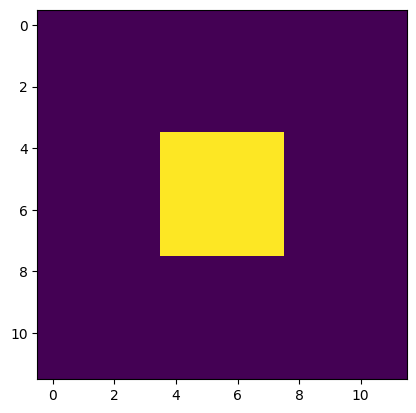

In [88]:
import matplotlib.pyplot as plt

n = 12
epsilon = 2e-1
A = A_efficiently(n, epsilon)

b = np.zeros((n, n))
b[n//2 - n//6:n//2 + n//6,n//2 - n//6:n//2 + n//6] = 1
b = b.flatten()
plt.imshow(b.reshape((n, n)))

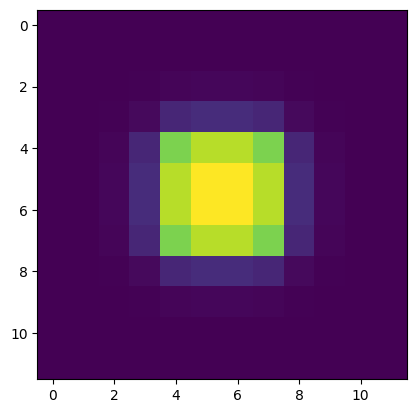

In [89]:
import scipy as sp

x = sp.sparse.linalg.spsolve(A, b)
plt.imshow(x.reshape(n, n))

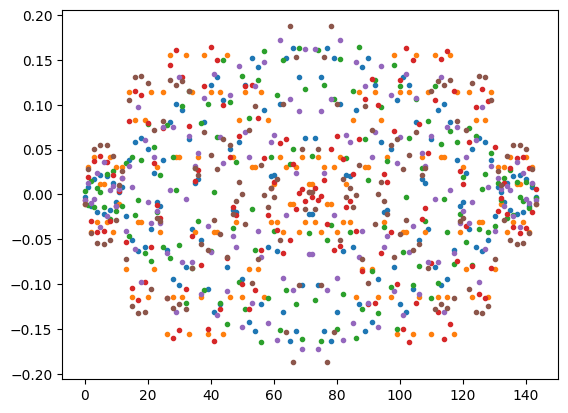

In [90]:
w, v = sp.sparse.linalg.eigs(A)
plt.plot(v.real, '.')

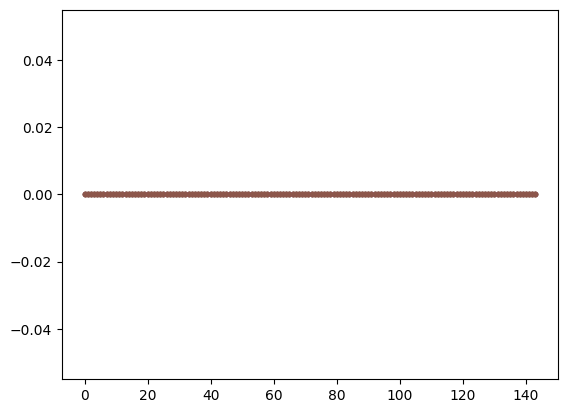

In [91]:
plt.plot(v.imag, '.') # imaginarni cast je velmi blizko nuly, tak ze nas zajima jen graf nahore

5. Nalezněte všechny kořeny Legendrova polynomu stupně 5 na intervalu $<-1,1>$

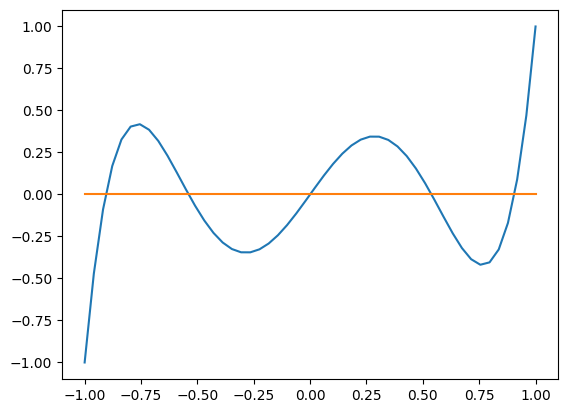

In [92]:
x = np.linspace(-1, 1)
fig, ax = plt.subplots()
ax.plot(x, sp.special.legendre(5)(x))
ax.plot(x, np.linspace(0, 0))
plt.show()

In [93]:
roots_np = np.roots(sp.special.legendre(5))
print(roots_np)

[-0.90617985 -0.53846931  0.90617985  0.53846931  0.        ]


6. Pomocí SymPy nalezněte všechny kořeny Legendrova polynomu stupně 5. Použíjte `sympy.legendre()` pro vytvoření výrazu odpovídajícímu Legendrovu polynomu.
- porovnejte výsledky s předchozím úkolem

In [94]:
import sympy as sp

x = sp.Symbol('x')
legendre_5 = sp.legendre(5, x)
legendre_5


63*x**5/8 - 35*x**3/4 + 15*x/8

In [95]:
roots_sp = sp.roots(legendre_5)
print(roots_sp)

{-sqrt(5/9 - 2*sqrt(70)/63): 1, sqrt(5/9 - 2*sqrt(70)/63): 1, -sqrt(2*sqrt(70)/63 + 5/9): 1, sqrt(2*sqrt(70)/63 + 5/9): 1, 0: 1}


In [96]:
roots_sp = []
for key in sp.roots(legendre_5).keys():
    roots_sp.append(key.evalf())
print(roots_sp)

[-0.538469310105683, 0.538469310105683, -0.906179845938664, 0.906179845938664, 0]


In [98]:
roots_np.sort()
roots_sp.sort()
for i in range(len(roots_np)):
    print(roots_np[i] - roots_sp[i])

-3.33066907387547e-16
-2.22044604925031e-16
0
0
-4.44089209850063e-16
